In [16]:
import tensorflow as tf
from PIL import Image
from tensorflow.keras import layers

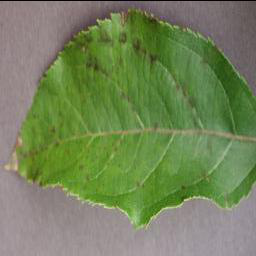

In [17]:
img=Image.open("/home/student/Desktop/VRIKSHA/plandie/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Apple_scab/0a5e9323-dbad-432d-ac58-d291718345d9___FREC_Scab 3417_90deg.JPG")
img

In [18]:
img=img.resize((32,32))

In [19]:
data=tf.keras.utils.image_dataset_from_directory("/home/student/Desktop/VRIKSHA/plandie/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train",
    image_size=(32,32),
    color_mode="rgb",
    batch_size=5000)

                          

Found 70295 files belonging to 38 classes.


In [20]:
for fe,la in data:
    print(fe.shape,la.shape)
    break

2023-05-25 13:00:29.142302: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 1054 of 40000
2023-05-25 13:00:39.014418: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 2184 of 40000
2023-05-25 13:00:49.020931: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 3326 of 40000
2023-05-25 13:00:59.015303: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 4234 of 40000
2023-05-25 13:01:09.016154: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 5141 of 40000
2023-05-25 13:01:19.050730: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 5991 of 40000
2023-05-25 13:01:29.067099: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling 

(5000, 32, 32, 3) (5000,)


In [21]:
cnn_model=tf.keras.Sequential([
    layers.Conv2D(9,3,input_shape=(32,32,3)),
    layers.MaxPool2D(),
    layers.Conv2D(18,3,activation="relu"),
    layers.MaxPool2D(),
    layers.Conv2D(36,3,activation="relu"),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(64),
    layers.Dense(10),
    layers.Softmax()
])

In [22]:
cnn_model.build(input_shape=(1,32,32,3))
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 9)         252       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 9)        0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 18)        1476      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 18)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 36)          5868      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 2, 2, 36)        

In [23]:
cnn_model.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

In [24]:
for images,labels in data:
    features=tf.divide(fe,255)
    labels=tf.one_hot(la,10)
    record=cnn_model.fit(features,labels,batch_size=50,epochs=10)
    break

2023-05-25 13:10:01.986694: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 239 of 40000
2023-05-25 13:10:11.971101: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 1075 of 40000
2023-05-25 13:10:21.951651: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 1953 of 40000
2023-05-25 13:10:31.959543: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 2910 of 40000
2023-05-25 13:10:41.950293: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 3815 of 40000
2023-05-25 13:10:52.039272: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 4754 of 40000
2023-05-25 13:11:01.956411: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling u

Epoch 1/10
100/100 [==============================] - 17s 54ms/step - loss: 8.8744 - accuracy: 0.0662
Epoch 2/10
100/100 [==============================] - 4s 38ms/step - loss: 955.4680 - accuracy: 0.1020
Epoch 3/10
100/100 [==============================] - 4s 38ms/step - loss: 12453.4551 - accuracy: 0.1024
Epoch 4/10
100/100 [==============================] - 4s 37ms/step - loss: 75878.5078 - accuracy: 0.0972
Epoch 5/10
100/100 [==============================] - 3s 34ms/step - loss: 215823.9531 - accuracy: 0.0946
Epoch 6/10
100/100 [==============================] - 3s 34ms/step - loss: 604067.2500 - accuracy: 0.0992
Epoch 7/10
100/100 [==============================] - 3s 34ms/step - loss: 1338160.8750 - accuracy: 0.0972
Epoch 8/10
100/100 [==============================] - 3s 34ms/step - loss: 2523480.5000 - accuracy: 0.1102
Epoch 9/10
100/100 [==============================] - 3s 34ms/step - loss: 4018233.0000 - accuracy: 0.1016
Epoch 10/10
100/100 [==============================]

In [25]:
model=cnn_model.save("image.h5",save_format="h5")

In [26]:
model


In [27]:
model1=tf.keras.models.load_model("image.h5")
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 9)         252       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 9)        0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 18)        1476      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 18)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 36)          5868      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 2, 2, 36)        